In [2]:
pip install scikit-learn imbalanced-learn matplotlib


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 537.6 kB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -------------------------------------- 167.0/167.0 kB 5.1 MB/s eta 0:00:00
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.0 MB 6.3 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Harsh Jain\Desktop\github\venv\Scripts\python.exe -m pip install --upgrade pip


### Results on Imbalanced Dataset ###
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       567
           1       0.75      0.45      0.57        33

    accuracy                           0.96       600
   macro avg       0.86      0.72      0.77       600
weighted avg       0.96      0.96      0.96       600

F1 Score on Imbalanced Dataset: 0.5660

### Results on Balanced Dataset ###
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       567
           1       0.59      0.73      0.65        33

    accuracy                           0.96       600
   macro avg       0.78      0.85      0.81       600
weighted avg       0.96      0.96      0.96       600

F1 Score on Balanced Dataset: 0.6486


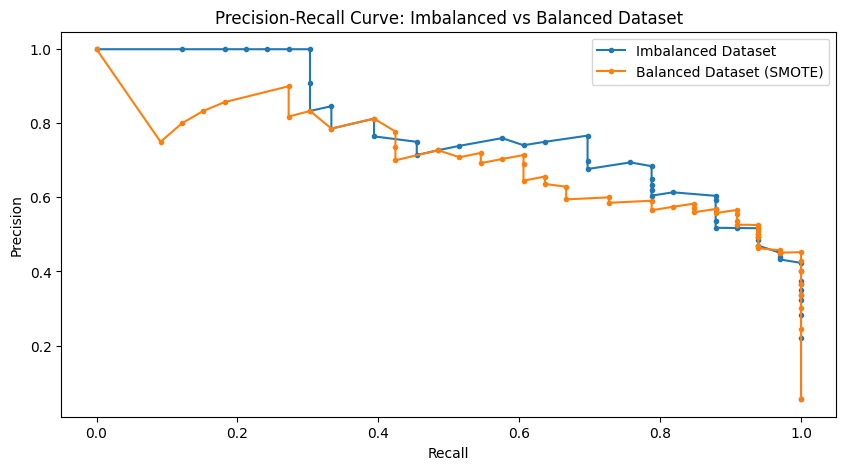

In [3]:
# Importing the necessary libraries
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Create an imbalanced dataset
X, y = make_classification(n_samples=2000, n_features=20, n_informative=2, n_redundant=10, 
                           n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Model on Imbalanced Dataset (Without SMOTE)
print("### Results on Imbalanced Dataset ###")
clf_imbalanced = RandomForestClassifier(random_state=42)
clf_imbalanced.fit(X_train, y_train)

# Predict on the imbalanced test set
y_pred_imbalanced = clf_imbalanced.predict(X_test)

# Generate classification report for evaluation on imbalanced dataset
report_imbalanced = classification_report(y_test, y_pred_imbalanced)
print(report_imbalanced)

# Precision-Recall curve for imbalanced dataset
precision_imbalanced, recall_imbalanced, _ = precision_recall_curve(y_test, clf_imbalanced.predict_proba(X_test)[:, 1])

# F1 score for imbalanced dataset
f1_imbalanced = f1_score(y_test, y_pred_imbalanced)
print(f"F1 Score on Imbalanced Dataset: {f1_imbalanced:.4f}")

### 2. Model on Balanced Dataset (With SMOTE)
print("\n### Results on Balanced Dataset ###")
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForest classifier on the resampled dataset
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_balanced = clf_balanced.predict(X_test)

# Generate classification report for evaluation on balanced dataset
report_balanced = classification_report(y_test, y_pred_balanced)
print(report_balanced)

# Precision-Recall curve for balanced dataset
precision_balanced, recall_balanced, _ = precision_recall_curve(y_test, clf_balanced.predict_proba(X_test)[:, 1])

# F1 score for balanced dataset
f1_balanced = f1_score(y_test, y_pred_balanced)
print(f"F1 Score on Balanced Dataset: {f1_balanced:.4f}")

### Plotting Precision-Recall Curves for comparison
plt.figure(figsize=(10, 5))

# Plot for imbalanced dataset
plt.plot(recall_imbalanced, precision_imbalanced, marker='.', label='Imbalanced Dataset')

# Plot for balanced dataset
plt.plot(recall_balanced, precision_balanced, marker='.', label='Balanced Dataset (SMOTE)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Imbalanced vs Balanced Dataset')
plt.legend()
plt.show()
